In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [2]:
HAAR_CASCADE_CLASSIFIERS = os.path.join(os.getcwd(), 'haarcasecade_classifiers', 'haarcascade_frontalface_default.xml')

In [3]:
IMAGE_PATH = "sample-1.jpg"

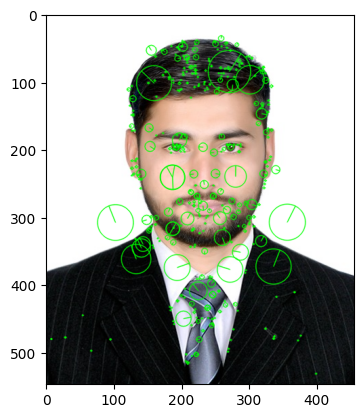

In [16]:
# Load the image
image = cv2.imread("sample-2.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create ORB detector
orb = cv2.SIFT_create()

# Detect keypoints and compute the descriptor
keypoints, descriptor = orb.detectAndCompute(gray, None)

# Draw the keypoints on the image
cv2.drawKeypoints(image, keypoints, image, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
plt.show()

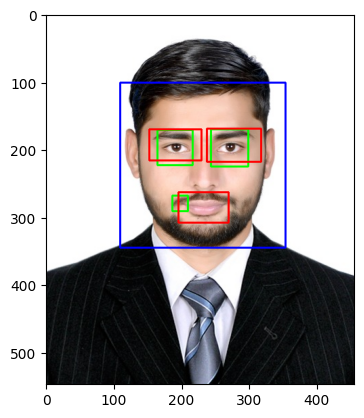

In [7]:
# load the image
image = cv2.imread("sample-2.jpg")

# convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect the face in the image
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# extract the x and y coordinates of the facial landmarks
for (x, y, w, h) in faces:
    # draw a rectangle around the face
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    # detect eyes in the face
    eyes_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
    eyes = eyes_cascade.detectMultiScale(roi_gray)
    # extract the x and y coordinates of the eyes
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
    # detect mouth in the face
    mouth_cascade = cv2.CascadeClassifier('haarcascade_mcs_mouth.xml')
    mouth = mouth_cascade.detectMultiScale(roi_gray)
    # extract the x and y coordinates of the mouth
    for (mx, my, mw, mh) in mouth:
        cv2.rectangle(roi_color, (mx, my), (mx+mw, my+mh), (0, 0, 255), 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

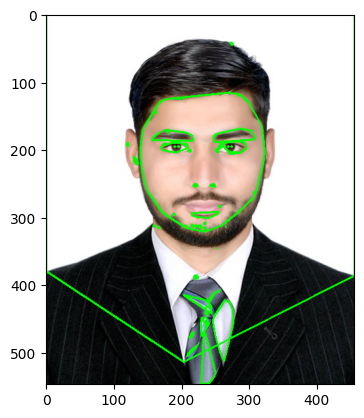

In [11]:
# Load the image
image = cv2.imread("sample-2.jpg")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to binary
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# Find the contours in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Find the convex hulls of the contours
hulls = [cv2.convexHull(c) for c in contours]

# Draw the convex hulls on the image
cv2.drawContours(image, hulls, -1, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))